# Challenge: Promotions

In this challenge, you'll develop codes to parse and analyze data returned from another API on Zalando such as [Promos homme (Men's Promotions)
](https://www.zalando.fr/promo-homme/) or [Promos femme (Women's Promotions)](https://www.zalando.fr/promo-femme/). The workflow is almost the same as in the guided lesson but you'll work with different data.

## Obtaining the link

Wrote your codes in the cell below to obtain the data from the API endpoint you choose. A recap of the workflow:

1. Examine the webpages and choose one that you want to work with.

1. Use Google Chrome's DevTools to inspect the XHR network requests. Find out the API endpoint that serves data to the webpage.

1. Test the API endpoint in the browser to verify its data.

1. Change the page number offset of the API URL to test if it's working.

In [2]:
companies = ['AAPL', 'MSFT', 'AMZN']

urls = ['https://financialmodelingprep.com/api/v3/financials/income-statement/' + i for i in companies]
urls

['https://financialmodelingprep.com/api/v3/financials/income-statement/AAPL',
 'https://financialmodelingprep.com/api/v3/financials/income-statement/MSFT',
 'https://financialmodelingprep.com/api/v3/financials/income-statement/AMZN']

## Reading the data

In the next cell, use Python to obtain data from the API endpoint you chose in the previous step. Workflow:

1. Import libraries.

1. Define the initial API endpoint URL.

1. Make request to obtain data of the 1st page. Flatten the data and store it in an empty object variable.

1. Find out the total page count in the 1st page data.

1. Use a FOR loop to make requests for the additional pages from 2 to page count. Append the data of each additional page to the flatterned data object.

1. Print and review the data you obtained.

In [3]:
import requests as r
import pandas as pd
import json

financials = []

for i in range(len(companies)):
    request = r.get(urls[i])
    json_req = request.json()

    financial = pd.DataFrame(json_req['financials'])
    financial['symbol'] = companies[i]
    
    financials.append(financial)
data = pd.concat(financials, ignore_index = True)

In [4]:
data.head()

,Consolidated Income,Cost of Revenue,Dividend per Share,EBIT,EBIT Margin,EBITDA,EBITDA Margin,EPS,EPS Diluted,Earnings Before Tax Margin,...,Preferred Dividends,Profit Margin,R&D Expenses,Revenue,Revenue Growth,SG&A Expense,Weighted Average Shs Out,Weighted Average Shs Out (Dil),date,symbol
0,59531000000.0,163756000000.0,2.72,72903000000.0,0.2745,83806000000.0,0.316,12.01,11.91,0.2745,...,0.0,0.224,14236000000.0,265595000000.0,0.1586,16705000000.0,4955377000.0,5000109000.0,2018-09-29,AAPL
1,48351000000.0,141048000000.0,2.4,64089000000.0,0.2796,74246000000.0,0.324,9.27,9.21,0.2796,...,0.0,0.211,11581000000.0,229234000000.0,0.063,15261000000.0,5217242000.0,5251692000.0,2017-09-30,AAPL
2,45687000000.0,131376000000.0,2.18,61372000000.0,0.2846,71877000000.0,0.333,8.35,8.31,0.2846,...,0.0,0.212,10045000000.0,215639000000.0,-0.0773,14194000000.0,5470820000.0,5500281000.0,2016-09-24,AAPL
3,53394000000.0,140089000000.0,1.98,72515000000.0,0.3103,83772000000.0,0.358,9.28,9.22,0.3103,...,0.0,0.228,8067000000.0,233715000000.0,0.2786,14329000000.0,5753421000.0,5793069000.0,2015-09-26,AAPL
4,39510000000.0,112258000000.0,1.811,53483000000.0,0.2926,61429000000.0,0.336,6.49,6.45,0.2926,...,0.0,0.216,6041000000.0,182795000000.0,0.0695,11993000000.0,6085572000.0,6122663000.0,2014-09-27,AAPL


In [5]:
data.columns

Index(['Consolidated Income', 'Cost of Revenue', 'Dividend per Share', 'EBIT',
       'EBIT Margin', 'EBITDA', 'EBITDA Margin', 'EPS', 'EPS Diluted',
       'Earnings Before Tax Margin', 'Earnings before Tax',
       'Free Cash Flow margin', 'Gross Margin', 'Gross Profit',
       'Income Tax Expense', 'Interest Expense', 'Net Income',
       'Net Income - Discontinued ops', 'Net Income - Non-Controlling int',
       'Net Income Com', 'Net Profit Margin', 'Operating Expenses',
       'Operating Income', 'Preferred Dividends', 'Profit Margin',
       'R&D Expenses', 'Revenue', 'Revenue Growth', 'SG&A Expense',
       'Weighted Average Shs Out', 'Weighted Average Shs Out (Dil)', 'date',
       'symbol'],
      dtype='object')

In [6]:
# pythonic column names

data.columns = data.columns.str.rstrip().str.replace(' (- )*', '_', regex = True).str.lower().str.replace('\W', '', regex = True)
data.columns

Index(['consolidated_income', 'cost_of_revenue', 'dividend_per_share', 'ebit',
       'ebit_margin', 'ebitda', 'ebitda_margin', 'eps', 'eps_diluted',
       'earnings_before_tax_margin', 'earnings_before_tax',
       'free_cash_flow_margin', 'gross_margin', 'gross_profit',
       'income_tax_expense', 'interest_expense', 'net_income',
       'net_income_discontinued_ops', 'net_income_noncontrolling_int',
       'net_income_com', 'net_profit_margin', 'operating_expenses',
       'operating_income', 'preferred_dividends', 'profit_margin',
       'rd_expenses', 'revenue', 'revenue_growth', 'sga_expense',
       'weighted_average_shs_out', 'weighted_average_shs_out_dil', 'date',
       'symbol'],
      dtype='object')

In [7]:
data.dtypes

consolidated_income              object
cost_of_revenue                  object
dividend_per_share               object
ebit                             object
ebit_margin                      object
ebitda                           object
ebitda_margin                    object
eps                              object
eps_diluted                      object
earnings_before_tax_margin       object
earnings_before_tax              object
free_cash_flow_margin            object
gross_margin                     object
gross_profit                     object
income_tax_expense               object
interest_expense                 object
net_income                       object
net_income_discontinued_ops      object
net_income_noncontrolling_int    object
net_income_com                   object
net_profit_margin                object
operating_expenses               object
operating_income                 object
preferred_dividends              object
profit_margin                    object


In [11]:
# change data types

data[data.columns[:-2]] = data[data.columns[:-2]].astype('float')
data.dtypes

consolidated_income              float64
cost_of_revenue                  float64
dividend_per_share               float64
ebit                             float64
ebit_margin                      float64
ebitda                           float64
ebitda_margin                    float64
eps                              float64
eps_diluted                      float64
earnings_before_tax_margin       float64
earnings_before_tax              float64
free_cash_flow_margin            float64
gross_margin                     float64
gross_profit                     float64
income_tax_expense               float64
interest_expense                 float64
net_income                       float64
net_income_discontinued_ops      float64
net_income_noncontrolling_int    float64
net_income_com                   float64
net_profit_margin                float64
operating_expenses               float64
operating_income                 float64
preferred_dividends              float64
profit_margin   

In [12]:
# missing data ratios per column

data.isna().sum().sort_values(ascending = False)[:10] / len(data) * 100

symbol                0.0
interest_expense      0.0
cost_of_revenue       0.0
dividend_per_share    0.0
ebit                  0.0
ebit_margin           0.0
ebitda                0.0
ebitda_margin         0.0
eps                   0.0
eps_diluted           0.0
dtype: float64

In [47]:
# quarter with highest profit margin per company

for i in companies:
    company = data.loc[data['symbol'] == i]
    top_quarter_pm = company.loc[company['profit_margin'] == company['profit_margin'].max(), 'date'].to_list()[0]
    print(i + ': ' + top_quarter_pm)

AAPL: 2012-09-29
MSFT: 2011-06-30
AMZN: 2018-12-31


In [55]:
# revenue growth in the last reported quarter per company

for i in companies:
    company = data.loc[data['symbol'] == i]
    last_quarter_rg = company.loc[company['date'] == company['date'].max(), 'revenue_growth'].to_list()[0]
    print(i + ': ' + str(last_quarter_rg))

AAPL: 0.1586
MSFT: 0.1403
AMZN: 0.3093


<Figure size 648x1152 with 0 Axes>

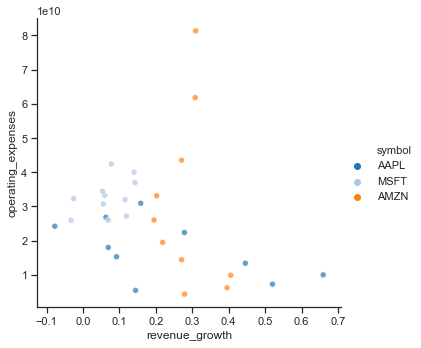

In [66]:
# correlation between revenue growth and operating expenses by company

import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (9, 16))
sns.set_style('ticks')
sns.set_context('notebook')

sns.relplot(x = 'revenue_growth', y = 'operating_expenses', hue = 'symbol', palette = 'tab20', alpha = .7, data = data)